# Практическая работа 1

## Цель работы

Провести анализ выбранного датасета и выявить интересные и возможные зависимости/закономернсоти в данных.

## Задачаи|

1. Провести исследование выбранного датасета
2. Использовать полученные знания для статистического анализа данных

## Описание датасета

В нашем распоряжении данные, взятые с kaggle.com — зарплаты за период 2020-2022гг в сфере Data Science. В датасете выделены 11 стобцов:
- work_year - год выплаты зарплаты
- experience_level - уровень опыта работы в течение года, где EN Начальный уровень / MI Мидл / SE Сеньёр / EX Профи
- employment_type - Тип занятости на роль, где: PT Неполный рабочий день / FT Полный рабочий день / CT Контракт / FL Фриланс
- job_title	- Точное название роли
- salary - Величина зарплаты (евро или доллар)
- salary_currency - Валюта выплачиваемой заработной платы
- salaryinusd - Заработная плата в долларах США (курс валюты, разделенный на средний курс доллара США за соответствующий год через fxdata.foorilla.com
- employee_residence - Основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166.
- remote_ratio - Общий объем удаленной работы, где: 0 Нет удаленной работы ( или менее 20%), 50 Частично удаленная работа, 100 Полностью удаленная работа (или более 80%)
- company_location - Страна главного офиса или филиала работодателя тоже в виде кода страны ISO 3166.
- company_size - Среднее количество людей, работавших в компании в течение года: S менее 50 сотрудников, M от 50 до 250 сотрудников, L более 250 сотрудников

## Изучение данных из файла

In [211]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [212]:
# Чтение нашего датасета с коренвой папки, где находится и исполняемый файл
data = pd.read_csv('ds_salaries.csv')
# Смотрим первые 11 строк
data.head(11)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
7,7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
8,8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
9,9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S


In [213]:
# смотрим размерность датасета
data.shape

(607, 12)

Датасет отобразился корректно. У нас 607 значений и 11 колонок, как и было первоначально заявлено + 1 колонка, дублирующая индексы. Удалим эту дублирующую колонку, а также изучим датасет чуть детальнее.

In [214]:
# Удаление лишней колонки
del data['Unnamed: 0']
# data.head(11)

In [215]:
# Смотрим общие характеристики по нашему датасету
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


Судя по всему, нам повезло, пропусков нет. Все типы данных для каждой колонки определнны верно, т.е. где предполагаем увидеть целое число у нас тип данных целого числа(int64), а где строковое значение - там тип object. И на всякий случай, убедимся в отсутствии пропусков по каждой категории, применив метод, определяющий наличие пропуска "isna()" и просуммируем методом "sum()". Каждый пропуск дает значение единицы, просуммировав все единицы, мы можем получить количество пропусков в каждом столбце.

In [216]:
data.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Все верно, пропусков нет.

Итак, думать, что делать с пропусками нами не придется, ввиду их отсутствия, типы данных все заявлены верно и наш датасет не требует добавления и/или изменения значение или тип значение какого-либо столбца. Но не исключено, что нам это потребуется при более конкретном исследовании гипотез.

## Исследование 1

### Выявляем самые популярные роли в сфере датасаенс

Первым, что приходит в голову и что становится интересно - это посмотреть есть ли у нас какие-то фавориты в ролях из сферы дата саенс.

Используем встроенный метод для получения датасета по заданной колонке с подсчетом всех уникальных значений в ней и подсчетом повторений по убыванию. Другими словами получаем частотную таблицу.

In [217]:
data['job_title'].value_counts().head(7)

Data Scientist               143
Data Engineer                132
Data Analyst                  97
Machine Learning Engineer     41
Research Scientist            16
Data Science Manager          12
Data Architect                11
Name: job_title, dtype: int64

Получили 50 различных значений. и есть 5 явных лидера, как: Data Scientist, Data Engineer и Data Analyst, Machine Learning Engineer, Research Scientist  и так далее. Остальные роли достаточно редки и уникальны.

Думаю есть смысл рассмотреть только первые 3-4 роли. Для этого создадим отдельную таблицу data_top4, куда включим только строки, где job_title равен одной из ролей из нашего "топ4".

In [218]:
data_top4 = data[(data['job_title'] == 'Data Scientist') |
                 (data['job_title'] == 'Data Engineer') |
                (data['job_title'] == 'Data Analyst') |
                (data['job_title'] == 'Machine Learning Engineer')]

Теперь посмотрим на диаграмму размаха, чтобы узнать все ли значения у нас входят в доверительный интервал или все же есть некоторые выбросы. Сделаем это с помощью функции boxplot.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbb0b2e5190>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbb0b2e5730>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbb0b2cbe80>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbb0b2e5cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbb0b2e5fa0>],
 'means': []}

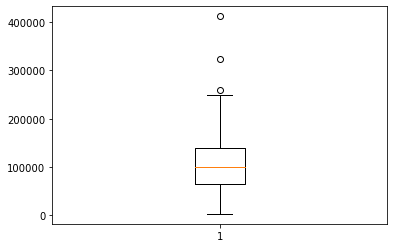

In [219]:
plt.boxplot(x=data_top4['salary_in_usd'])

Большинство данных лежит в пределах "усов", есть только три значения, которые прям выбивается за "усы". Рассчитаем интерквартильный размах и определим верхнюю, границу, чтобы понять, какие 3 значения нам лучше не учитывать. Используем функцию из библиотеки numpyдля поиска 25 и 75 персентиля.

In [220]:
# data_top4['salary_in_usd'].describe()
irt = np.percentile(data_top4['salary_in_usd'], 75) - np.percentile(data_top4['salary_in_usd'], 25)

Так как исходя из боксплота видим, что ниже "усов" у нас нет выбросов, то найти можно только верхнюю границу: 75 персентиль + 1.5 межквартильного размаха.

In [221]:
a = np.percentile(data_top4['salary_in_usd'], 75) + 1.5 * irt
a

254150.0

Определили верхнюю границу, теперь взглянем, что за три таких значения.

In [222]:
data_top4[data_top4['salary_in_usd'] > 254150]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
63,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
416,2022,SE,FT,Data Scientist,260000,USD,260000,US,100,US,M
482,2022,EX,FT,Data Engineer,324000,USD,324000,US,100,US,M


В целом, видя информацию по этим "выбросам" или точнее даже "уникумам", "счастливчикам", можно понять почему это произошло. ЧТо касается первых 2х - это датасаентисты, сеньёры, на полной удаленке, Амеркианская компания. Для первого датасаентиста в 2020году повезло получить оклад в 412к долларов и устроиться в компанию, где больше 250 человек. А вот второму не очень уже повезло в 2022 году оклад в 1,5 раза меньше, чем первому и компания уже поменьше от 50 до 250 сотрудников. 
Что касается третьего - это датаинженер в 2022 году, мастер своего дела, на удаленке в америке и в компании от 50-250.
В целом думаю, да, это действительно уникумы и думаю их можно исключить из датасета, который будем далее исследовать.

In [223]:
data_top4 = data_top4[data_top4['salary_in_usd'] <= 254150]

Далее создадим частотную таблицу в зависимости от года по нашим топ4, используя комбинацию методов groupby и value_counts. С помощью метода unstack немного "переиндексируем" нашу таблицу, чтобы можно было найти пересечение количества нужной роли и года. А затем строим простенькую гистограмму с помощью plot(kind='bar').

job_title,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer
work_year,,,,
2020,7,11,20,5
2021,17,32,45,18
2022,73,88,76,18


<AxesSubplot:title={'center':'Количество предложений по топ ролям в год'}, xlabel='work_year'>

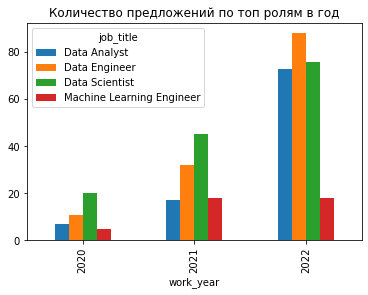

In [224]:
data_top4_sorted = data_top4.groupby('work_year')['job_title'].value_counts().unstack()
display(data_top4_sorted)

data_top4_sorted.plot(kind='bar', title='Количество предложений по топ ролям в год')

По данной столбчатой диаграмме видим, как увеличилось количество предложений по каждой из выбранных ролей. Если только в 2020 году общее число по топ4 ролям не превышало в сумме 44 позиций, то уже в 2022 году, повились явные 3 лидера, по каждому из которых уже было по 70+ предложений. И если лидером 20 и 21 годов была роль Data Scientist, то в 22 первенство, с достатчно хорошим отрывом, взяла роль Data Engineer.

Ради интереса рассчитаем во сколько раз увеличилось количество предложений по ролям из топ 4 в 2022 году по сравнению с 2020 годом.

In [225]:
# Добавим новыю колонку - сумма всех ролей топ4 в указанный год
data_top4_sorted['summ'] = data_top4_sorted[['Data Scientist','Data Engineer',
                                            'Data Analyst', 'Machine Learning Engineer']].sum(axis=1)
display(data_top4_sorted)
# рассчитаем все показатели: во сколько раз увеличилоськоличество предложений по DA, DS, DE, ML и округлим
da = round(data_top4_sorted.iloc[2]['Data Analyst'] / data_top4_sorted.iloc[0]['Data Analyst'])
de = round(data_top4_sorted.iloc[2]['Data Engineer'] / data_top4_sorted.iloc[0]['Data Engineer'])
ds = round(data_top4_sorted.iloc[2]['Data Scientist'] / data_top4_sorted.iloc[0]['Data Scientist'])
ml = round(data_top4_sorted.iloc[2]['Machine Learning Engineer'] / data_top4_sorted.iloc[0]
           ['Machine Learning Engineer'])
sm = round(data_top4_sorted.iloc[2]['summ'] / data_top4_sorted.iloc[0]['summ'])
display(da, de, ds, ml, sm)

job_title,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,summ
work_year,,,,,
2020,7,11,20,5,43
2021,17,32,45,18,112
2022,73,88,76,18,255


10

8

4

4

6

Из полученной гистограммы можно увидеть несколько интересных моментов:
1. Мы видим существенное увеличение количества специалистов в 2022 году по сравнению с 2020 годом, абсолютно по всем ролям из топ4
    1. Общее количество вакансий из топ4 увеличилось примерно в 6 раз
    2. Количество предложений по дата аналитикам увеличлось примерно в 10 раз
    3. Количество предложений по дата инженерам увеличлось примерно в 8 раз
    4. Количество предложений по дата саентистам увеличлось примерно в 4 раза
    5. Количество предложений по ML-инженерам увеличлось примерно в 4 раза
2. Роль дата саентистов в 2022 уступила свое первое место дата инженерам
3. Потребность в специалистах по машшинному обучению была одинаковой в 21 и 22 годах

Посчитаем какой процент занимают наши топ 4 из общего количества вакансий, ради интереса.

In [226]:
data_top4.shape[0] / data.shape[0] * 100

67.54530477759472

68% из всех имеющихся в датасете ролей составляют наши топ 4. Есть предположение исходя из показателей топ4 за 22 год, что сфера ДС стала сильно масштабироваться и из отдельных ключевых навыков датасаентиста и стали рождаться новые роли, то есть ролей из оставшихся 32% должны прийтись на 22 год. Проверим

In [227]:
data_no_top4 = data[(data['job_title'] != 'Data Scientist') &
                 (data['job_title'] != 'Data Engineer') &
                (data['job_title'] != 'Data Analyst') &
                (data['job_title'] != 'Machine Learning Engineer')]
data_no_top4.groupby('work_year')['job_title'].count()

work_year
2020     28
2021    105
2022     61
Name: job_title, dtype: int64

Ну, почти верно. Видимо, тренд на дробление компетенций на новые роли произошел больше в 21 году, а уже в 22 выделились "мэин роли" в виде DA и DI

## Исследование 2

### Как изменялась зарплата в течении трех лет у ДС

В данном датасете уже есть специальнная колонка с перерасчетом зарплаты в доллар по принципу: курс валюты, разделенный на средний курс доллара США за соответствующий год через fxdata.foorilla.com. Воспользуемся этой колонкой, чтобы определить среднее значение, медианное, моду по зарплате в долларах для данной роли. И к этому всему еще докрутим учет опыта работы данного специалиста

Создадим отдельный датафрейм и сгруппируем данные по опыту работы. А так же найдем среднее, медианное моду и СКО для зарплат каждого значения опыта работы.

mean  median    std    moda
work_year experience_level                               
2020      EN                 54983   50294  28088   51321
          MI                 71256   62726  35724   79833
          SE                 93222   91237  25843   68428
2021      EN                 53622   49646  34540  100000
          MI                 72145   73000  47342   90734
          SE                 91782   87738  48653   53192
2022      EN                 59508   52396  33529   18442
          MI                 99574   95807  47753  130000
          SE                157900  146000  39937  140000

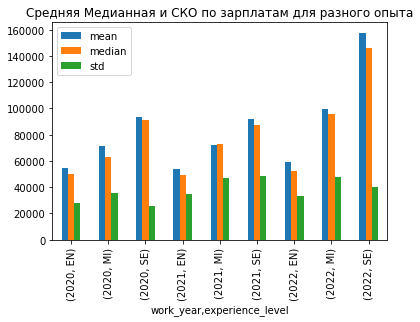

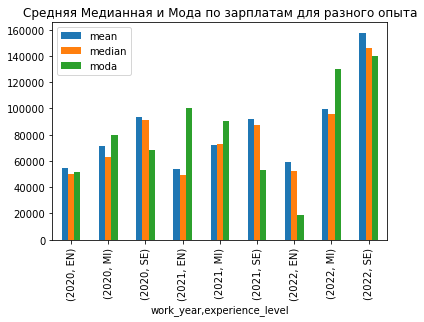

In [228]:
# Создаем датафрейм только с дата саентистами
data_ds = data_top4[data_top4['job_title'] == 'Data Scientist']
# создаем в отдельную функцию моду для дальнейших расчетов
moda = lambda x: x.value_counts().index[0]
# группируем наш датасет по годам 20-21-22 и по опыту работы и считаем среднее, медиану, СКО и моду для зп в долларах
data_ds = data_ds.groupby(['work_year', 'experience_level'])['salary_in_usd'].agg(
                                                            ['mean', 'median', 'std', moda]
                                                                              )
# округлим до целого полученные значения для небольшого удобства
# для этого сначала округлили значения в серии, а потом методом astype, преобразовали все наши значения серии в тип целого
# data_ds.round()
data_ds = data_ds.apply(lambda x: round(x)).astype('int')

# переименуем столбец с функцией моды <lambda_0> на "moda"
data_ds.rename(columns = {'<lambda_0>' : 'moda'}, inplace = True)
# построим две отдельные столбчатые диаграммы, чтобы удобнее было сравнивать
data_ds.plot(y=['mean', 'median', 'std'], kind='bar', title='Средняя Медианная и СКО по зарплатам для разного опыта')
data_ds.plot(y=['mean', 'median', 'moda'], kind='bar', title='Средняя Медианная и Мода по зарплатам для разного опыта')
display(data_ds)

Из полученной гистаграммы мы можем наблюдать интересные штуки:
1. В целом за последние три года для датасаентистов разного опыта медианная зарплата всегда относительно близка к среднему значению. Кроме 21 года для мидлов. Думаю это классический сценарий когда средняя немного выше, чем медианная. Но и небольшая разница тоже хороший сигнал, говорящий также о том, что в зарплатах данного специалиста не было супер "жирного" предложения или наоборот супер маленького. То есть распределение по зарплатам было практически симметричным без явных скосов.
2. В 21 году для мидлов зарплатный рынок вероятно был, немного недооценен, ибо медианное значение слегка превышает среднее. Такое явление говорит нам о том, что в 21 году на позицию мидл дс могли встречаться достаточно низкие зарплатные предложения. СКО, который выше половины среднего значения, так же это подтверждает.
3. В 2022 году по сравнению с 2020 и 2021 можно увидеть некое "логическое стабилизирование" рынка, когда идёт пропорциональное увеличение зарплаты в зависимости от опыта специалиста, при этом показатели среднего, медианы и СКО не дают нам сигнала о том, что есть какие-то аномалии. Даже напротив, СКО для сеньеров в 2022 году маленькое, по сравнению с предыдущим годом, это значит, что денежная оценка специалиста такого уровня приобрела более постоянный характер и вся "зарплатная вилка" сосредоточена рядом относительного среднего.
5. Если смотреть на другую гистограмму где убрали среднее но добавили моду, то 2022 год для сеньеров был действительно хорошим, самое "часто встречающаяся зп" буквально чуть-чуть уступает медиане и среднему.
6. А в 2022 году для джунов наоборот, "оценка их компитенций" была чаще всего достаточно низкой.

## Исследование 3

### Посомтрим есть ли зависимость между средней зарплатой ДА специалиста в зависимости от опыта работы, типа занятости, страны проживания, страны компании и размеров компании

In [229]:
# - work_year - год выплаты зарплаты
# - experience_level - уровень опыта работы в течение года, где EN Начальный уровень / MI Мидл / SE Сеньёр / EX Профи
# - employment_type - Тип занятости на роль, где: PT Неполный рабочий день / FT Полный рабочий день / CT Контракт / FL Фриланс
# - job_title	- Точное название роли
# - salary - Величина зарплаты (евро или доллар)
# - salary_currency - Валюта выплачиваемой заработной платы
# - salaryinusd - Заработная плата в долларах США (курс валюты, разделенный на средний курс доллара США за соответствующий год через fxdata.foorilla.com
# - employee_residence - Основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166.
# - remote_ratio - Общий объем удаленной работы, где: 0 Нет удаленной работы ( илименее 20%), 50 Частично удаленная работа, 100 Полностью удаленная работа (или более 80%)
# - company_location - Страна главного офиса или филиала работодателя тоже в виде кода страны ISO 3166.
# - company_size - Среднее количество людей, работавших в компании в течение года: S менее 50 сотрудников, M от 50 до 250 сотрудников, L более 250 сотрудников


Создадим отдельный датасет для дата аналитиков

In [230]:
data_da = data_top4[data_top4['job_title'] == 'Data Analyst']

Сгруппируем данные по году выплаты зп, опыту работы и найдем среднюю зарплату в долларах.Затем сделаем "подиндекс" в виде опыта работы в качестве отдельного столбца, с помощью метода unstack и построим столбчатую диаграмму, добавим аргумент и значение "stacked=True", чтобы получить гистограмму не с отдельными столбцами по каждому году для каждого вида опыта работы, а в виде одного столбца, который отражает "соотношение" величин.

<AxesSubplot:title={'center':'Средняя зарплата аналитиков в зависимости от опыта'}, xlabel='work_year'>

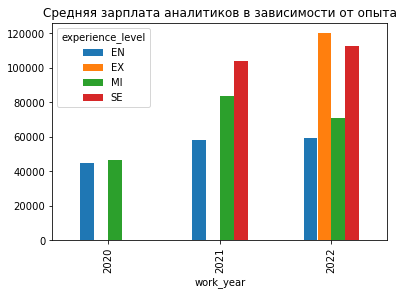

In [231]:
data_da.groupby(['work_year', 'experience_level'])['salary_in_usd'].mean().unstack().plot(
    kind='bar', title='Средняя зарплата аналитиков в зависимости от опыта')

1. Видим, что в целом с каждым годом начиная с 2020 появлялся "новый уровень" по опыту. Словно на наших глазах родилась абсолютно новая профессия. В 2020 началось все с джуна и мидла, в 21м уже на сцену вышел сеньер, а в 2022 добавились в общий пул еще и эксперты.
2. Средняя зп джунов за 3 года сильно не изменилась, зп мидлов немного скачет, то чуть поднимется, то в 22 снова снизилась. Зп сеньеров чуть увеличлась в 2022 году по сравнению с 21. Ну и логично что средняя зп "экспертов" занимает первое место.

Рассмотрим тоже самое но в зависимости от типа работы

<AxesSubplot:title={'center':'Средняя зарплата аналитика в зависимости от типа занятости'}, xlabel='work_year'>

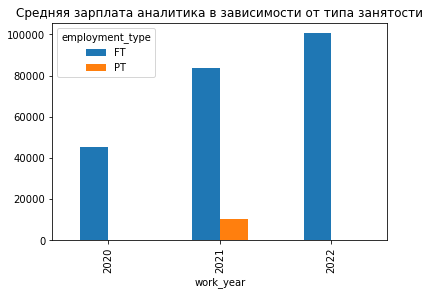

In [232]:
data_da.groupby(['work_year', 'employment_type'])['salary_in_usd'].mean().unstack().plot(
    kind='bar', title='Средняя зарплата аналитика в зависимости от типа занятости')

По данной взаимсовязи особо нечего сказать, практически 98% случаев тип занятости - полный рабочий день и зп на протяжении всех 3х лет растет. в 21 году чуток появились предложения по неполному рабочему дню, но и средняя зарплата была достаточно низка (что в целом и логично), данные виды работы вряд ли могут быть объективно между собой сопоставимы.

Теперь посмотрим какие есть страны проживания у наших дата аналитиков за 3 года.

In [233]:
data_da['employee_residence'].value_counts()

US    70
CA     9
GB     5
ES     3
GR     3
FR     2
PK     1
NG     1
IN     1
BG     1
DE     1
Name: employee_residence, dtype: int64

Гранпри у США, потом Канада, Англия, Испания и так далее. Хочется выделить две группы и посмотреть зависимость средней зп от стран проживания сотрудников. И даже плюсом еще выделить отдельно США, группу из 2,3,4 места и оставшиеся.

In [234]:
usa_max = data_da[data_da['employee_residence'] == 'US']['salary_in_usd'].max()
usa_mean = data_da[data_da['employee_residence'] == 'US']['salary_in_usd'].mean()

top2_4_max = data_da[(data_da['employee_residence'] == 'CA') |
                    (data_da['employee_residence'] == 'GB') |
                    (data_da['employee_residence'] == 'ES') |
                    (data_da['employee_residence'] == 'GR')]['salary_in_usd'].max()
top2_4_mean = data_da[(data_da['employee_residence'] == 'CA') |
                    (data_da['employee_residence'] == 'GB') |
                    (data_da['employee_residence'] == 'ES') |
                    (data_da['employee_residence'] == 'GR')]['salary_in_usd'].mean()

cellar_max = data_da[(data_da['employee_residence'] != 'CA') |
                    (data_da['employee_residence'] != 'GB') |
                    (data_da['employee_residence'] != 'ES') |
                    (data_da['employee_residence'] != 'GR') |
                    (data_da['employee_residence'] != 'US')]['salary_in_usd'].max()
cellar_mean = data_da[(data_da['employee_residence'] != 'CA') |
                    (data_da['employee_residence'] != 'GB') |
                    (data_da['employee_residence'] != 'ES') |
                    (data_da['employee_residence'] != 'GR') |
                    (data_da['employee_residence'] != 'US')]['salary_in_usd'].mean()

display(usa_max, top2_4_max, cellar_max)
display(usa_mean, top2_4_mean, cellar_mean)

200000

130000

200000

108069.5

58599.9

92893.06185567011

Ну, сказать, что специалистов из других стран ценят хуже, чем с америки однозначно не можем. Мах по зп у сша одинаковый со странами "меньшинства", да и средняя зп практически у них одинакова. А вот специалистов из стран топ2-4 будто меньше ценят в денежном эквиваленте.

Теперь посомтрим на зависимость между средней зп и местонахождением головного офиса компании.

<AxesSubplot:title={'center':'Средняя зарплата аналитиков в зависимости от местонахождения компании'}, xlabel='work_year'>

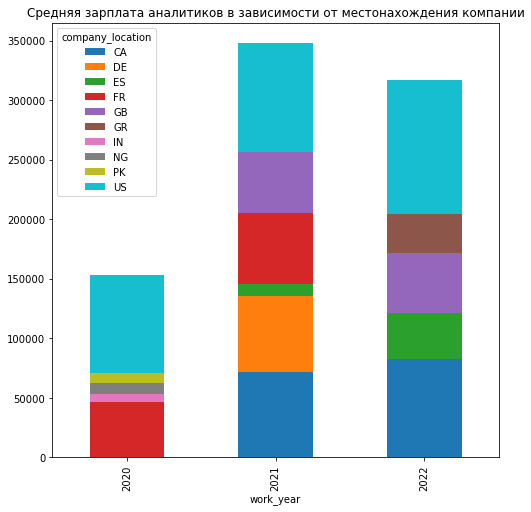

In [235]:
data_da.groupby(['work_year', 'company_location'])['salary_in_usd'].mean().unstack().plot(
    kind='bar', stacked=True, figsize=(8,8), title='Средняя зарплата аналитиков в зависимости от местонахождения компании')

Здесь можем отметить, что первыми, кто начала анализировать данные это компании с головным офисом в СШа, конечно же, и Франция. В 2021 году на арене появились канадцы, немцы, англичане и дргуие. а в 2022 остались США, Канада, Великобритания, Испания и Греция(Оо).

Теперь посомтрим на зависимость между средней зп и размером компаний.

<AxesSubplot:title={'center':'Средняя зарплата аналитиков в зависимости от размера компании'}, xlabel='work_year'>

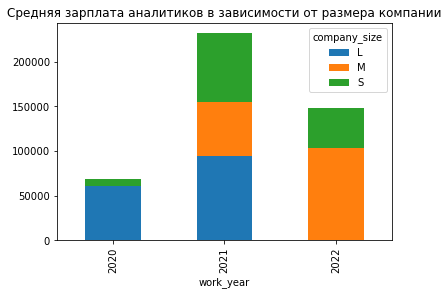

In [236]:
data_da.groupby(['work_year', 'company_size'])['salary_in_usd'].mean().unstack().plot(
    kind='bar', stacked=True, title='Средняя зарплата аналитиков в зависимости от размера компании')

Как будто бы логично, что анализом данных первыми начали крупные компании, у кого было что анализировать, и мелкие компании с амбициями вероятно. Затем появились средние компании. Что и ожидаемо средняя зп у крупных компаний была выше, чем у кого-либо, но второе место у маленьких компаний. А вот в 2022 году крупные компании совсем ушли с арены, видимо максимально оставив аналитику средним и мелким компаниям на аутсорс.

## Исследование 4

### Проделаем ту же работу что и в исследоваии 3, только уже для дата инженеров.

Так же создадим отдельный датасет для дата инженеров

In [237]:
data_di = data_top4[data_top4['job_title'] == 'Data Engineer']

Сгруппируем данные по году выплаты зп, опыту работы и найдем среднюю зарплату в долларах.Затем сделаем "подиндекс" в виде опыта работы в качестве отдельного столбца, с помощью метода unstack и построим столбчатую диаграмму, добавим аргумент и значение "stacked=True", чтобы получить гистограмму не с отдельными столбцами по каждому году для каждого вида опыта работы, а в виде одного столбца, который отражает "соотношение" величин.

<AxesSubplot:title={'center':'Зависимость средней зарплата инженеров от опыта работы'}, xlabel='work_year'>

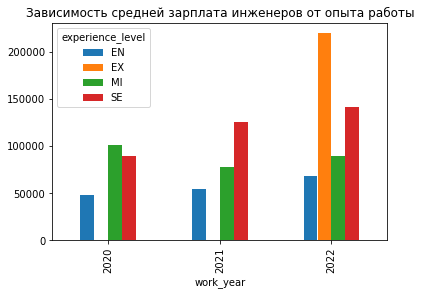

In [238]:
data_di.groupby(['work_year', 'experience_level'])['salary_in_usd'].mean().unstack().plot(
    kind='bar', title='Зависимость средней зарплата инженеров от опыта работы')

Выглядит так будто, роль дата инженеров в 2020 году была развита чуть посильнее уже, чем роль аналитиков. Но все так же молода, потому что средние зарплаты мидлов и сеньеров не очень то и различаются. В 2021 году ситуация становится чуть яснее и логичнее, сеньеров ценят лучше, чем мидлов и джунов потом соотвественно. А в 2022 году появляется просто супер лидер по средней зп - это эксперты.

Рассмотрим как зависит оплата труда от типа работы

<AxesSubplot:title={'center':'Зависимсоть средней зарплаты инженеров от типа занятости'}, xlabel='work_year'>

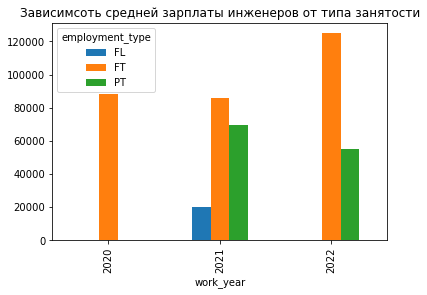

In [239]:
data_di.groupby(['work_year', 'employment_type'])['salary_in_usd'].mean().unstack().plot(
    kind='bar', title='Зависимсоть средней зарплаты инженеров от типа занятости')

В целом здесь такая же ситуация, как у аналитиков. Преобладает полная занятость, но вот в 21 году средняя зп тех, кто работает по частичной занятости почти поравнялась со средней зп тех, кто работает фултайм и даже немного вылезли фрилансеры.

Теперь посмотрим какие есть страны проживания дата инженеров за 3 года.

In [240]:
data_di['employee_residence'].value_counts()

US    81
GB    18
ES     5
GR     5
DE     2
TR     2
FR     2
PK     2
IN     2
NL     2
RO     2
IR     1
HK     1
IT     1
JP     1
MT     1
AT     1
MX     1
PL     1
Name: employee_residence, dtype: int64

И здесь тоже Америка - явный лидер. И на втором месте с относительно тоже неплохим отрывом от остальных идет Великобритания.

ПОсомтрим с помощью круговой диаграммы на соотношение средней зп в зависимости от страны кандидата за 2022 год

<AxesSubplot:title={'center':'Соотношение по средней зарплате в зависимости от проживания кандидата в 2022 году'}, ylabel='salary_in_usd'>

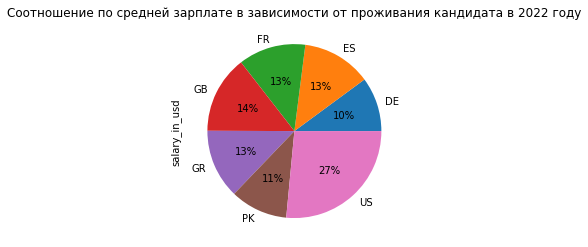

In [241]:
# Выделили данные за 22 год, сгруппировали по стране проживания, и считаем среднее по зп в долларах
data_di[data_di['work_year'] == 2022].groupby('employee_residence')['salary_in_usd'].mean().plot(
                kind='pie', # строим круговую диаграмму
                autopct='%1.0f%%', # устанавливаем отображение в процентах
                title='Соотношение по средней зарплате в зависимости от проживания кандидата в 2022 году') # задаем заголовок

Видим, что в 22 ничего не изменилось, Сша несомненный лидер даже по средней зарплате, второе место у великабритании и далее идут остальные страны.

Теперь посомтрим на зависимость между средней зп и местонахождением головного офиса компании. Сначала выделим топ 5 стран по количеству предложений. А затем для них построим стоолбчатую диаграмму, как и для аналитиков.

In [242]:
data_di['company_location'].value_counts().head(5)

US    84
GB    20
GR     5
DE     4
ES     4
Name: company_location, dtype: int64

<AxesSubplot:title={'center':'Зависимость средней зарплаты от местонахождения компании'}, xlabel='work_year'>

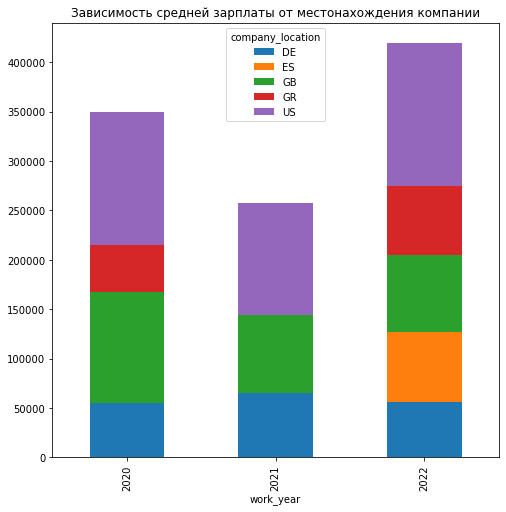

In [243]:
data_di2 = data_di[(data_di['company_location'] == 'US') |
       (data_di['company_location'] == 'GB') |
       (data_di['company_location'] == 'GR') |
       (data_di['company_location'] == 'DE') |
       (data_di['company_location'] == 'ES')]
data_di2.groupby(['work_year', 'company_location'])['salary_in_usd'].mean().unstack().plot(
    kind='bar', stacked=True, figsize=(8,8), title='Зависимость средней зарплаты от местонахождения компании')

Как и в частотной таблице, здесь тоже видим, что штаты являются явными лидерами по средней величине зп в каждый год с 2020-2022, и на пятки старается натсупать им Великобритания.

Посомтрим на зависимость между средней зп и размером компаний.

<AxesSubplot:title={'center':'Зависимость средней зарплаты инженеров от размера компании'}, xlabel='work_year'>

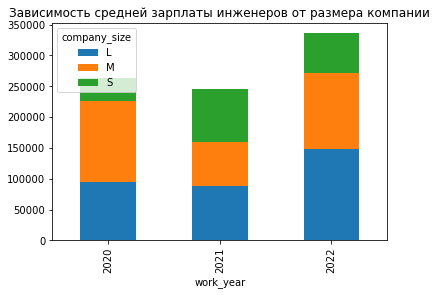

In [244]:
data_di.groupby(['work_year', 'company_size'])['salary_in_usd'].mean().unstack().plot(
    kind='bar', stacked=True, title='Зависимость средней зарплаты инженеров от размера компании')

Здесь уже видим, что во всех годах датасета, предложения шли от рразного уровня компаний, как и от маленьких, средних, так и от больших. Можем отметить, что средняя зарплата крупынх компаний увеличилась, в целом и средняя зарплата средних и маленьких компаний тоже. Но все же они не выше, чем у больших компаний.

## Общий вывод

1. В сфере датасаенс появились явные 3 отдельные роли: аналитики, инженеры и датасаентисты остались как роль тоже. 
2. Увидел, что сфера датасаенс действительно набирает обороты по количеству предложений, по масштабированию сферы и по увеличению средней заработной платы.
3. Выделил три суперпопулярных роли и провел исследование по ним. Да, действительно для роли датасаенс опыт работы сказывается на среднюю зп.
4. Просматрвиается увеличение средней зп у дата аналитиков в зависимости от опыта работы сотрудника, от местонахождения компании и от величины этой компании. Но трудно сказать, что есть зависимость от типа занятости. По этому поводу можно только сказать, что средняя зарплата просто в целом увеличилась в 2022 году по сравнению с 20ым.
5. Тоже самое просматрвиается у дата инженеров. Средняя зарпалата напрямую зависит от опыта сотрудника, от местонахождения компании и от ее масштабов. Так же тех кто работает фул тайм получает больше чем парттайм.